In [1]:
%reload_ext autoreload
%autoreload 2
%reload_ext ipy_dict_hierarchy
%reload_ext watermark

import os
import pymc as pm
import nutpie
import numpy as np
import pandas as pd
import arviz as az
import sys
import matplotlib.pyplot as plt
from itertools import product
from tqdm.notebook import tqdm
from arviz.plots.backends.matplotlib import matplotlib_kwarg_dealiaser


import logging

logging.basicConfig(
    format="%(asctime)s | %(levelname)-8s | %(name)-s | %(funcName)-s | %(message)s",
    level=logging.WARNING,
)
log = logging.getLogger("notebook")
log.setLevel("DEBUG")

extra_path = os.path.abspath("../")
sys.path.append(extra_path)
log.info(f"project directory: {extra_path}")

from ana import utility as utl
from ana import plot_helper as ph
from ana import bayesian_models as bm

ph.log.setLevel("DEBUG")
utl.log.setLevel("DEBUG")

data_dir = os.path.abspath("/path/to/repo/experiment_analysis/dat/")


2024-06-03 07:26:39,031 | INFO     | notebook | <module> | project directory: /data.nst/lucas/projects/mouse_visual_timescales_predictability/paper_code_repo/experiment_analysis


In [2]:

# load our results from timescale fitting
df = pd.read_hdf(f"{data_dir}/all_units_merged_blocks_with_spont.h5", key="meta_df")

# add metrics from image selectivity etc.
df = utl.load_metrics(
    df.reset_index(),
    data_dir,
    csvs=[
        # we need to combine data from different files, because we use spontaneous and natural movie stimuli
        "brain_observatory_1.1_analysis_metrics.csv",
        "functional_connectivity_analysis_metrics.csv",
    ],
    cols=["on_screen_rf"],
)
df = utl.add_structure_and_hierarchy_scores(df)
df = utl.load_experiments(df, data_dir)

# pymc does not like bools:
log.info(f'invalid metric rows: {df["on_screen_rf"].isna().sum()}')
df["on_screen_rf"] = df["on_screen_rf"].astype("int")

len_before = len(df)
df = df.query("tau_R > 0.0")
df = df.query("tau_double > 0.0 & tau_double < 10.0")
# timescales above 10s are likely an inference problems,
# as we have 600 - 800 seconds of data. cf. https://arxiv.org/abs/2007.03367
len_after = len(df)
log.info(f"removed {len_before - len_after} rows due to unexpected timescales")

# some further preprocessing is done in the model class
# see ana/bayesian_models.py

# Only plot for cortical areas
df = df.query(f"structure_name in ['V1', 'LM', 'RL', 'AL', 'PM', 'AM']")


2024-06-03 07:30:06,541 | DEBUG    | its_utility | load_metrics | Loaded columns ['unit_id', 'on_screen_rf'] from /data.nst/lucas/projects/mouse_visual_timescales_predictability/paper_code/experiment_analysis/data/brain_observatory_1.1_analysis_metrics.csv
2024-06-03 07:30:06,843 | DEBUG    | its_utility | load_metrics | Loaded columns ['unit_id', 'on_screen_rf'] from /data.nst/lucas/projects/mouse_visual_timescales_predictability/paper_code/experiment_analysis/data/functional_connectivity_analysis_metrics.csv
2024-06-03 07:30:06,843 | INFO     | its_utility | load_metrics | Column on_screen_rf found in multiple dataframes.
2024-06-03 07:30:06,846 | DEBUG    | its_utility | load_metrics | Matched 6368 rows from meta_df in /data.nst/lucas/projects/mouse_visual_timescales_predictability/paper_code/experiment_analysis/data/brain_observatory_1.1_analysis_metrics.csv
2024-06-03 07:30:10,619 | DEBUG    | its_utility | load_metrics | Matched 11581 rows from meta_df in /data.nst/lucas/projects

In [3]:
# Load plotting settings
plot_settings = {}

plot_settings["imgdir"] = "../img"
plot_settings["img_format"] = "pdf"
plot_settings["textwidth"] = 5.787402103
plot_settings["panel_width"] = 0.37 * plot_settings["textwidth"]
plot_settings["panel_height"] = 2.9
plot_settings["panel_size"] = (
    plot_settings["panel_width"],
    plot_settings["panel_height"],
)
plot_settings["rcparams"] = {
    "axes.labelsize": 11,
    "font.size": 11,
    # "font.family": "serif",
    # "font.serif": "Computer Modern Roman",
    "legend.fontsize": 9,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    # transparent figure bg
    "savefig.facecolor" : (0.0, 0.0, 0.0, 0.0),
    "axes.facecolor" : (1.0, 0.0, 0.0, 0.0),
    # 'text.usetex': True,
        # 'figure.figsize': [4.6299216824, 3]  # 0.8 * width
    "figure.figsize": [plot_settings["panel_width"], plot_settings["panel_height"]],}
plt.rcParams.update(plot_settings["rcparams"])

array([[<Axes: title={'center': 'session_slope'}>,
        <Axes: title={'center': 'session_slope'}>],
       [<Axes: title={'center': 'session_intercept'}>,
        <Axes: title={'center': 'session_intercept'}>]], dtype=object)

2024-05-29 22:39:33,296 | WARNING  | matplotlib.font_manager | _find_fonts_by_props | findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
2024-05-29 22:39:33,309 | WARNING  | matplotlib.font_manager | _find_fonts_by_props | findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
2024-05-29 22:39:33,310 | WARNING  | matplotlib.font_manager | _find_fonts_by_props | findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
2024-05-29 22:39:33,311 | WARNING  | matplotlib.font_manager | _find_fonts_by_props | findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
2024-05-29 22:39:33,312 | WARNING  | matplotlib.font_manager | _find_fonts_by_props | findfont: Generic family 'serif' not found because none of the following families were found: Computer Mod

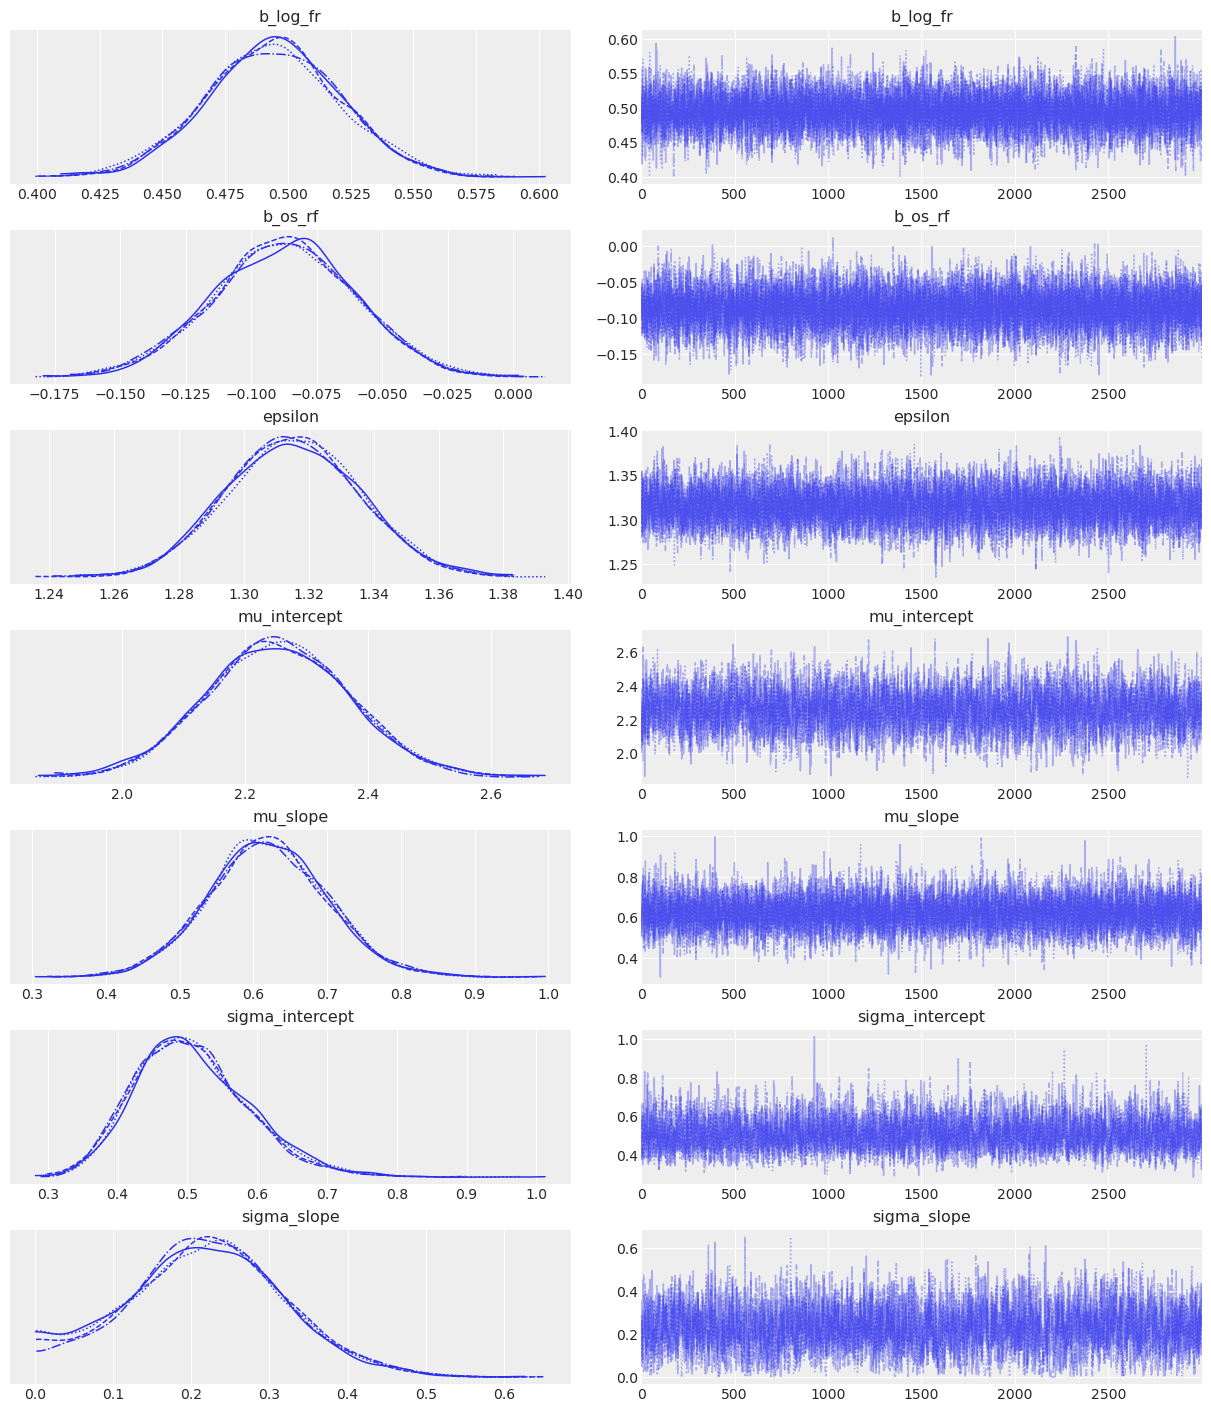

2024-05-29 22:39:36,692 | WARNING  | matplotlib.font_manager | _find_fonts_by_props | findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
2024-05-29 22:39:36,693 | WARNING  | matplotlib.font_manager | _find_fonts_by_props | findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
2024-05-29 22:39:36,694 | WARNING  | matplotlib.font_manager | _find_fonts_by_props | findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
2024-05-29 22:39:36,694 | WARNING  | matplotlib.font_manager | _find_fonts_by_props | findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman
2024-05-29 22:39:36,695 | WARNING  | matplotlib.font_manager | _find_fonts_by_props | findfont: Generic family 'serif' not found because none of the following families were found: Computer Mod

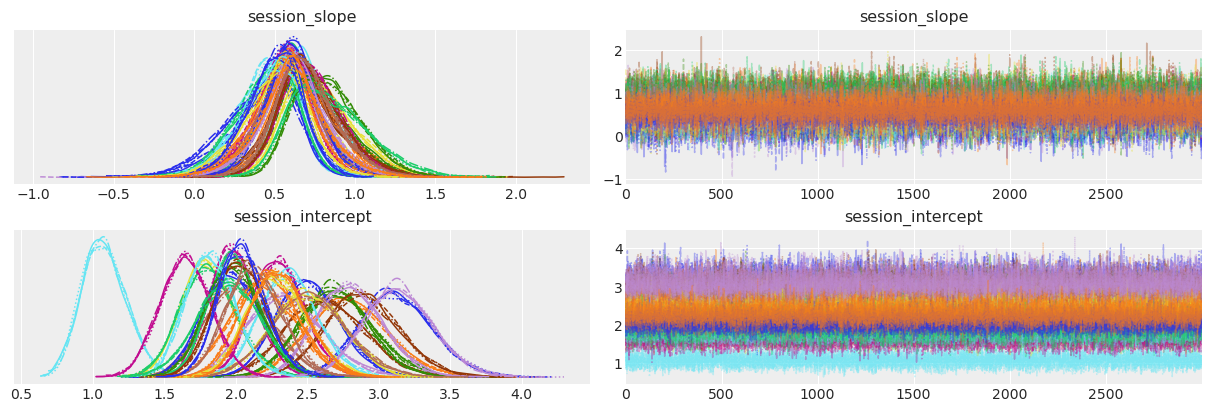

In [8]:
az.summary(
    idata,
    var_names=[
        "b_log_fr",
        "b_os_rf",
        "epsilon",
        "mu_intercept",
        "mu_slope",
        "sigma_intercept",
        "sigma_slope",
        "session_slope",
    ],
)

az.style.use("arviz-darkgrid")
# blue lines represent chains
az.plot_trace(
    idata,
    var_names=[
        "b_log_fr",
        "b_os_rf",
        "epsilon",
        "mu_intercept",
        "mu_slope",
        "sigma_intercept",
        "sigma_slope",
    ],
    legend=False,
)
# color varies across sessions
az.plot_trace(
    idata,
    var_names=[
        "session_slope",
        "session_intercept",
    ],
    legend=False,
)

  0%|          | 0/9 [00:00<?, ?it/s]

tau_double natural_movie_three
median:  2.2532017401070226
median:  0.49904191540089327


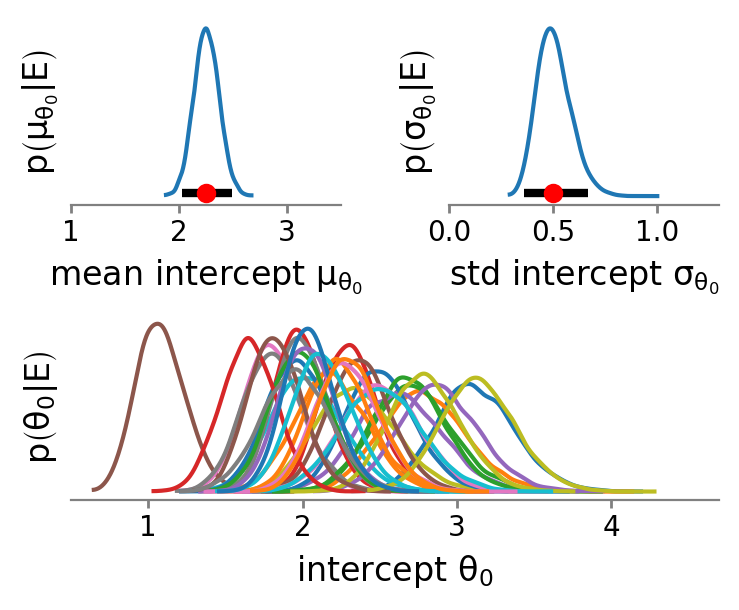

tau_double spontaneous
median:  2.5416848316590785
median:  0.6865179089006886


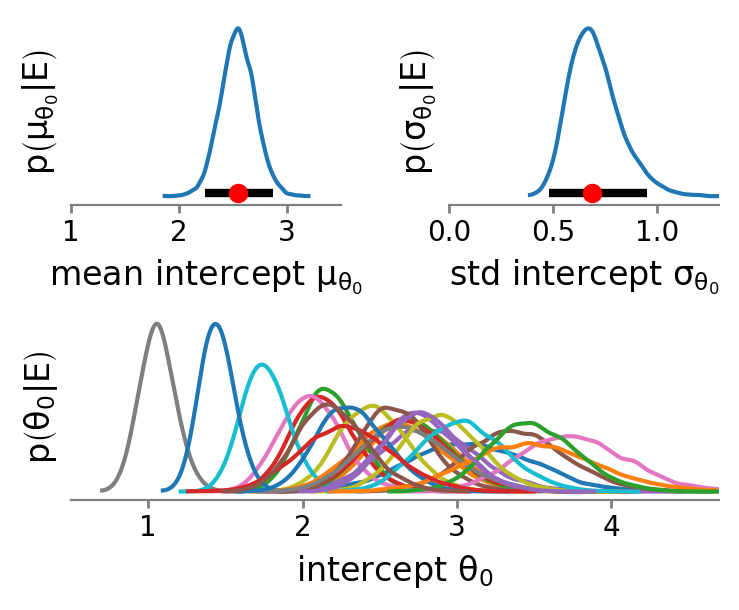

tau_double natural_movie_one_more_repeats
median:  2.129589563693819
median:  0.43511574249736845


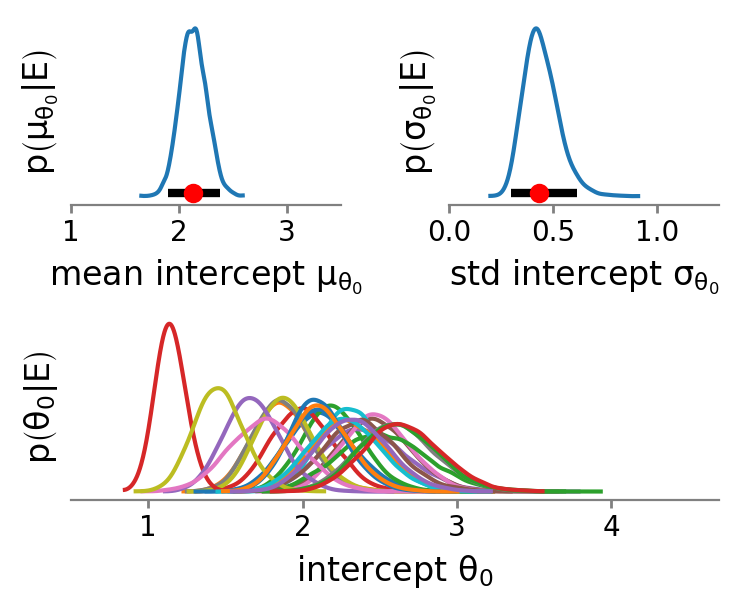

tau_R natural_movie_three
median:  2.6069733505541235
median:  0.4481073336017647


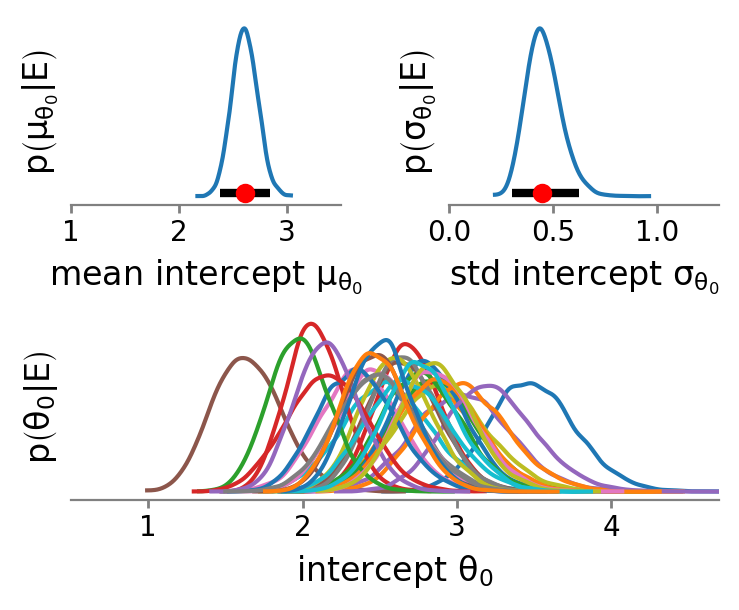

tau_R spontaneous
median:  2.879304191896112
median:  0.5766203615892018


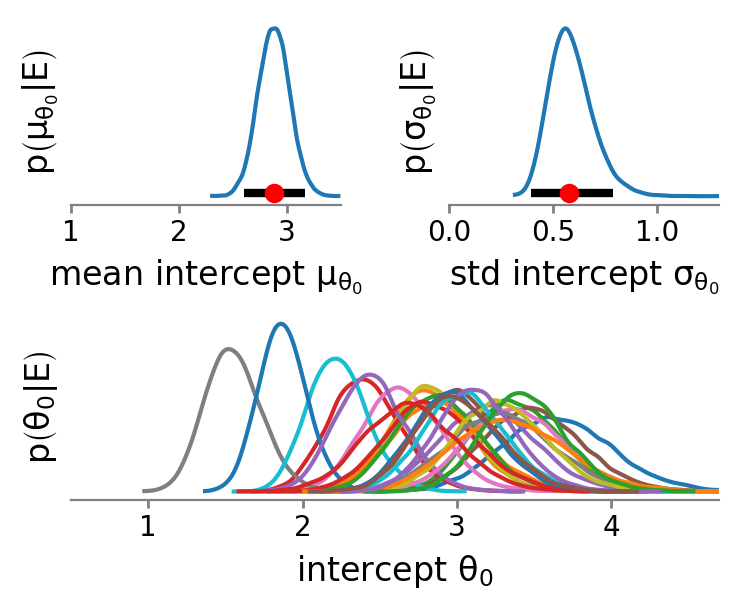

tau_R natural_movie_one_more_repeats
median:  2.4380564225213464
median:  0.4076174280558943


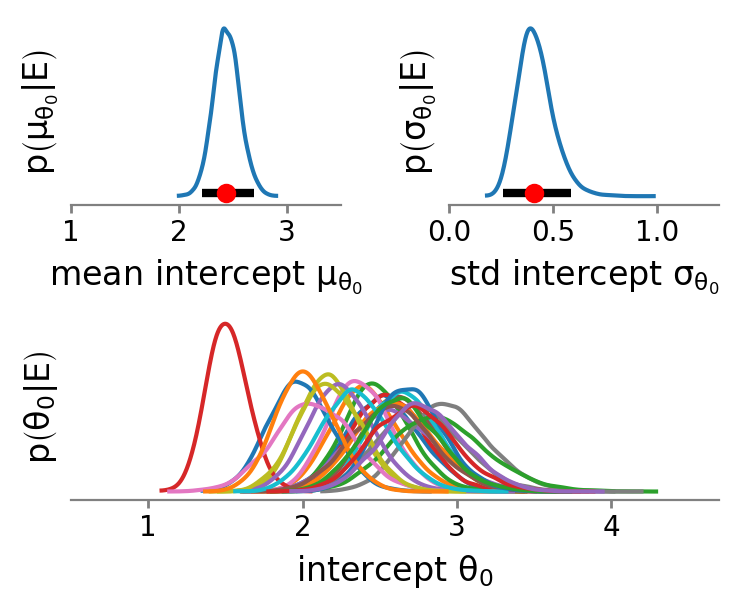

R_tot natural_movie_three
median:  1.0532659660474368
median:  0.20315862481991087


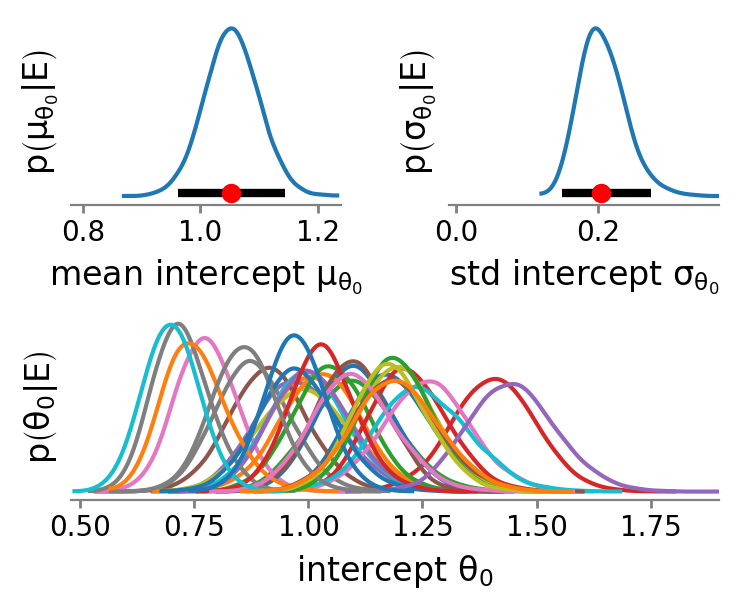

R_tot spontaneous
median:  1.063899273647455
median:  0.0783597877681507


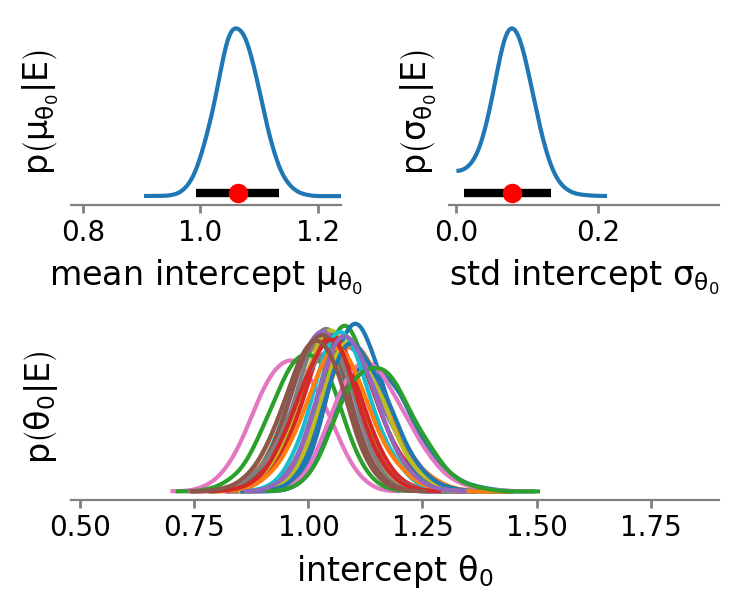

R_tot natural_movie_one_more_repeats
median:  1.0749417042133784
median:  0.16210157643364587


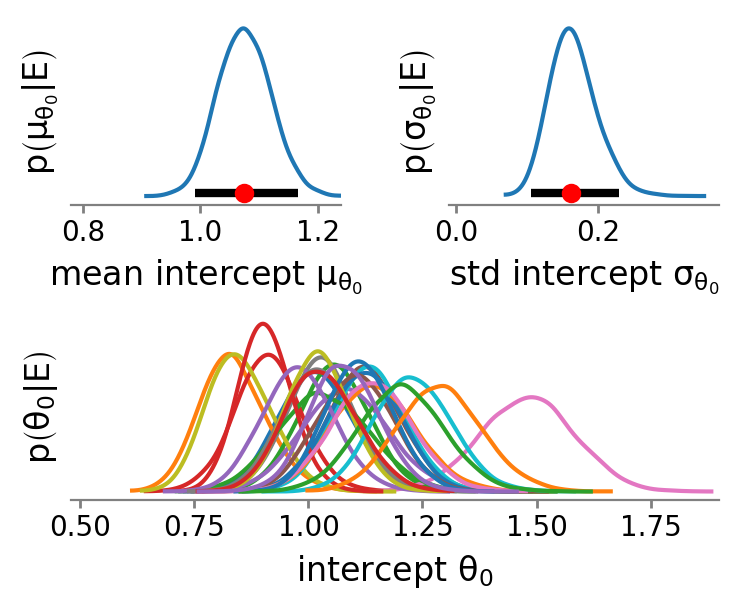

In [15]:
# posterior visualization (hierarchical parameters) for hierarchy score model

model = "lmm"
measures = ["tau_double", "tau_R", "R_tot"]
stimuli = ["natural_movie_three", "spontaneous", "natural_movie_one_more_repeats"]

combinations = list(product(measures, stimuli))
loos = dict()
rc_kwargs = {
    "xtick.labelsize" : 10,
    "ytick.labelsize" : 10,
    "axes.titlesize" : 12,
    "axes.labelsize" : 12,
    "font.size" : 10,
}

with plt.rc_context(rc_kwargs):
    # Plot hierarchy score posteriors for different measures and stimuli
    for meas, stim in tqdm(combinations):
        print(meas, stim)
        idata = az.from_netcdf(f"{data_dir}/bayes_cortex_{model}_{meas}_{stim}.nc")

        # # slope

        fig = plt.figure(figsize=(plot_settings["panel_width"] * 1.7, 3))
        # fig.suptitle(measure_name, ha = "center")
        # fig.suptitle("hierarchy score slope", ha = "center")

        ax1 = plt.subplot(2, 2, 1)
        ax2 = plt.subplot(2, 2, 2)
        ax3 = plt.subplot(2, 1, 2)
        fig.subplots_adjust(left=0.01, right=0.9, top=0.9, bottom=0.1, hspace=0.6, wspace=0.4)
        # if args.measure == "tau_C":
        #     ax1.set_xlim([-0.05,0.22])
        #     ax3.set_xlim([-0.24,0.44])
        # if args.measure == "tau_R":
        #     ax1.set_xlim([-0.02,0.14])
        #     ax3.set_xlim([-0.12,0.27])
        # if args.measure == "R_tot":
        #     ax1.set_xlim([-0.18,0.06])
        #     ax3.set_xlim([-0.31,0.21])
        if meas == "R_tot":
            bw = 0.01
        else:
            bw = 0.05
        ph.plot_posterior(
            idata,
            ax=ax1,
            var_names = ["mu_slope"],
            point_estimate="median",
            hdi_prob=0.95,
            bw=bw,
        )
        ax1.set_xlabel(r"mean slope $\mu_{\theta_{\mathrm{hs}}}$")
        ax1.set_ylabel(r"$p\left(\mu_{\theta_{\mathrm{hs}}} | E\right)$")
        ph.plot_posterior(
            idata,
            ax=ax2,
            var_names=["sigma_slope"],
            point_estimate="median",
            hdi_prob=0.95,
            bw=bw,
        )
        ax2.set_xlabel(r"std slope $\sigma_{\theta_{\mathrm{hs}}}$")
        ax2.set_ylabel(r"$p\left(\sigma_{\theta_{\mathrm{hs}}} | E\right)$")

        ph.plot_posterior(
            idata,
            ax=ax3,
            var_names=["session_slope"],
            hdi=False,
            bw=bw*2, # plotting session posteriors looks better with higher bandwidth
        )
        ax3.set_xlabel(r"hierarchy score slope $\theta_{\mathrm{hs}}$")
        ax3.set_ylabel(r"$p\left(\theta_{\mathrm{hs}} | E\right)$")

        ax1.axvline(x=0, ls="--", lw=2, color="0.0")
        ax3.axvline(x=0, ls="--", lw=2, color="0.0")

        if meas == "R_tot":
            ax1.set_xlim([-0.25,0.07]) # xrange for mean slope
            ax2.set_xlim([-0.02, 0.22]) # xrange for std slope
            ax3.set_xlim([-0.41, 0.31]) # xrange for session slope
        else: # ranges for timescale posteriors
            ax1.set_xlim([-0.1, 1.2]) # xrange for mean slope
            ax2.set_xlim([-0.1, 1.2]) # xrange for std slope
            ax3.set_xlim([-2.7, 2.7]) # xrange for session slope

        # for ax in [ax1, ax2, ax3]:
        #     utl.make_plot_pretty(ax)
        plt.show()
        fig.savefig(f"../img/bayes_cortex_{model}_hierarchy_slope_posterior_{meas}_{stim}.pdf", bbox_inches="tight", dpi=300)

        # # intercept

        fig = plt.figure(figsize=(plot_settings["panel_width"] * 1.7, 3))
        # fig.suptitle(measure_name, ha = "center")
        # fig.suptitle("hierarchy score slope", ha = "center")

        ax1 = plt.subplot(2, 2, 1)
        ax2 = plt.subplot(2, 2, 2)
        ax3 = plt.subplot(2, 1, 2)
        fig.subplots_adjust(
            left=0.01, right=0.9, top=0.9, bottom=0.1, hspace=0.6, wspace=0.4
        )
        # if args.measure == "tau_C":
        #     ax1.set_xlim([-0.05,0.22])
        #     ax3.set_xlim([-0.24,0.44])
        # if args.measure == "tau_R":
        #     ax1.set_xlim([-0.02,0.14])
        #     ax3.set_xlim([-0.12,0.27])
        # if args.measure == "R_tot":
        #     ax1.set_xlim([-0.18,0.06])
        #     ax3.set_xlim([-0.31,0.21])
        if meas == "R_tot":
            bw = 0.01
        else:
            bw = 0.02
        ph.plot_posterior(
            idata,
            ax=ax1,
            var_names=["mu_intercept"],
            point_estimate="median",
            hdi_prob=0.95,
            bw=bw,
        )
        ax1.set_xlabel(r"mean intercept $\mu_{\theta_0}$")
        ax1.set_ylabel(r"$p\left(\mu_{\theta_0} | E\right)$")
        ph.plot_posterior(
            idata,
            ax=ax2,
            var_names=["sigma_intercept"],
            point_estimate="median",
            hdi_prob=0.95,
            bw=bw,
        )
        ax2.set_xlabel(r"std intercept $\sigma_{\theta_0}$")
        ax2.set_ylabel(r"$p\left(\sigma_{\theta_0} | E\right)$")

        ph.plot_posterior(
            idata,
            ax=ax3,
            var_names=["session_intercept"],
            hdi=False,
            bw=bw * 2,  # plotting session posteriors looks better with higher bandwidth
        )
        ax3.set_xlabel(r"intercept $\theta_{0}$")
        ax3.set_ylabel(r"$p\left(\theta_{0} | E\right)$")

        # fix ranges
        if meas == "R_tot":
            ax1.set_xlim([0.78, 1.24])  # xrange for mean slope
            ax2.set_xlim([-0.01, 0.37])  # xrange for std slope
            ax3.set_xlim([0.48, 1.9])  # xrange for session slope
        else:  # ranges for timescale posteriors
            ax1.set_xlim([1.0, 3.5])  # xrange for mean slope
            ax2.set_xlim([0, 1.3])  # xrange for std slope
            ax3.set_xlim([0.5, 4.7])  # xrange for session slope

        # for ax in [ax1, ax2, ax3]:
        #     utl.make_plot_pretty(ax)
        plt.show()
        fig.savefig(
            f"../img/bayes_cortex_{model}_intercept_posterior_{meas}_{stim}.pdf",
            bbox_inches="tight",
            dpi=300,
        )



  0%|          | 0/9 [00:00<?, ?it/s]

tau_double natural_movie_three
median:  0.4853448957764105
median:  0.4008268324622386


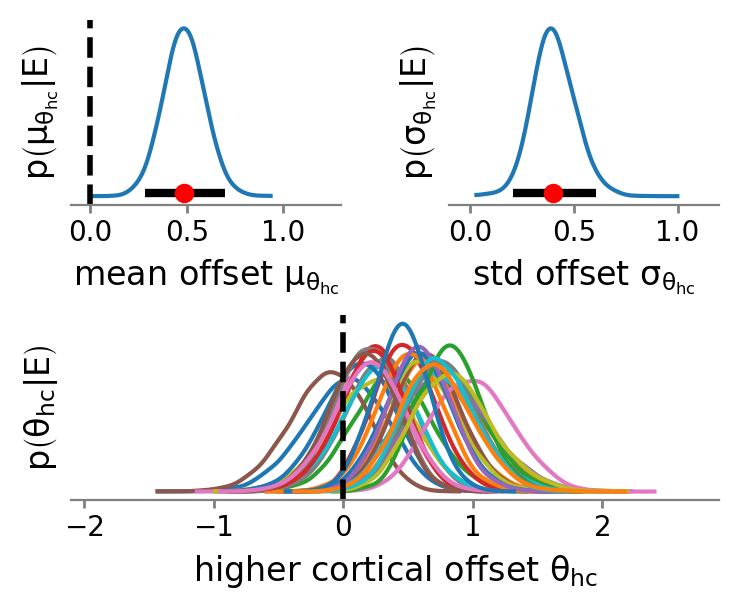

median:  2.3053189872388318
median:  0.4244986806361357


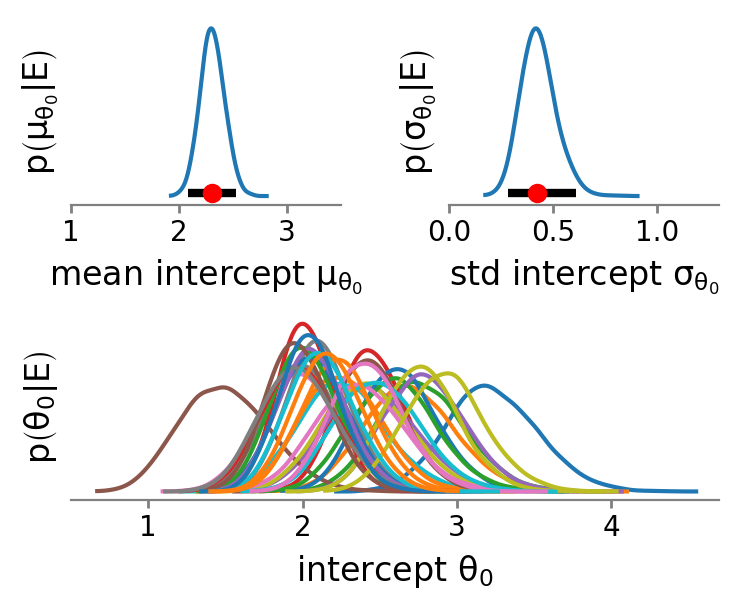

tau_double spontaneous
median:  0.4477852583672811
median:  0.5563118936136658


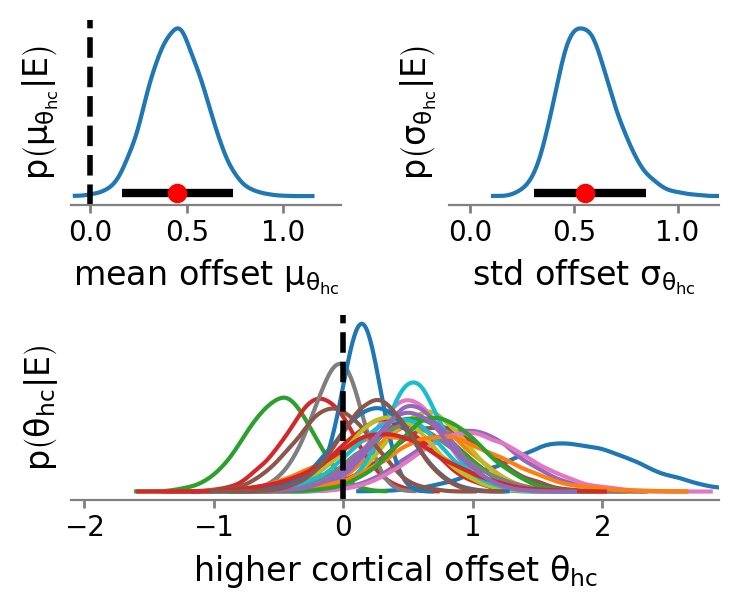

median:  2.5996932672833744
median:  0.6697864641277199


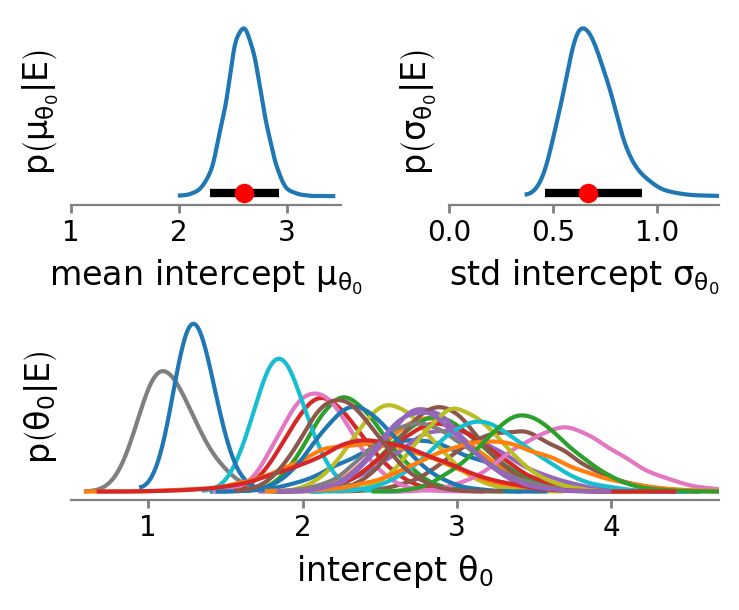

tau_double natural_movie_one_more_repeats
median:  0.40588287861945715
median:  0.363394468112305


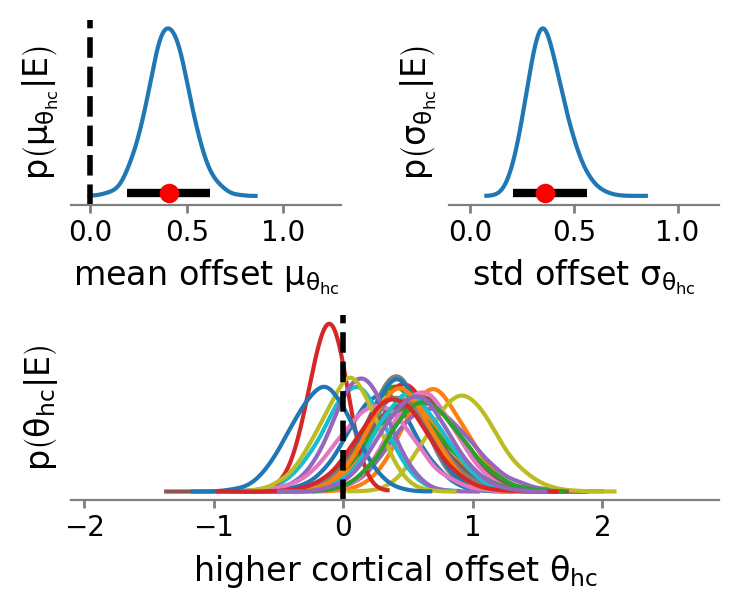

median:  2.1974929528459755
median:  0.40047279003953473


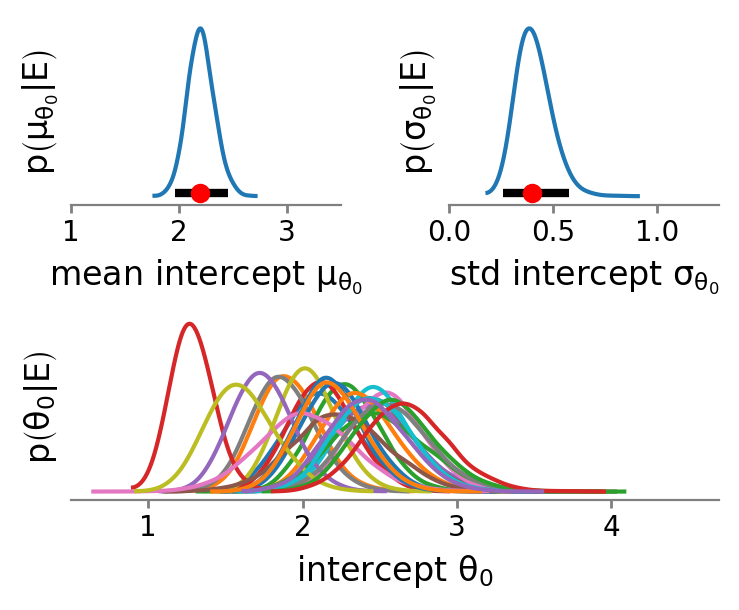

tau_R natural_movie_three
median:  0.5892261678205603
median:  0.5139234965794197


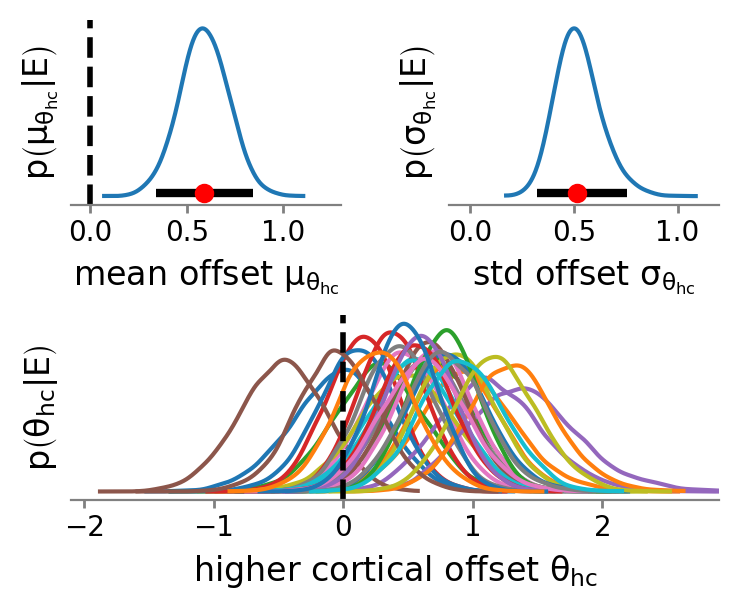

median:  2.653593915912636
median:  0.3648132352082697


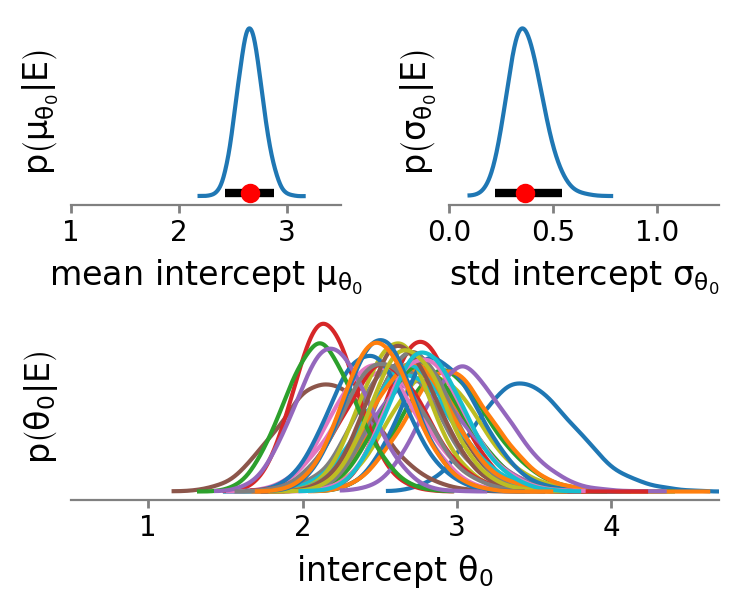

tau_R spontaneous
median:  0.31288360614182253
median:  0.46959158724069094


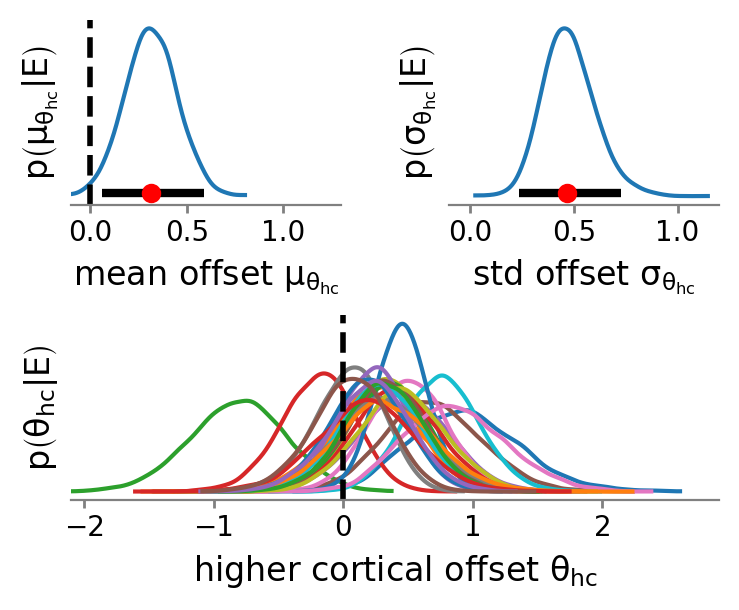

median:  2.967865450288408
median:  0.5716881767368228


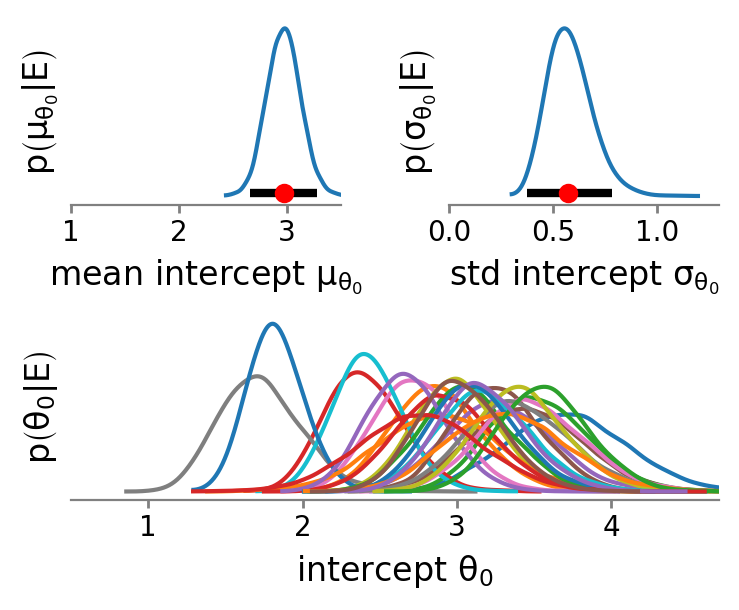

tau_R natural_movie_one_more_repeats
median:  0.7134478335748093
median:  0.5067535765098261


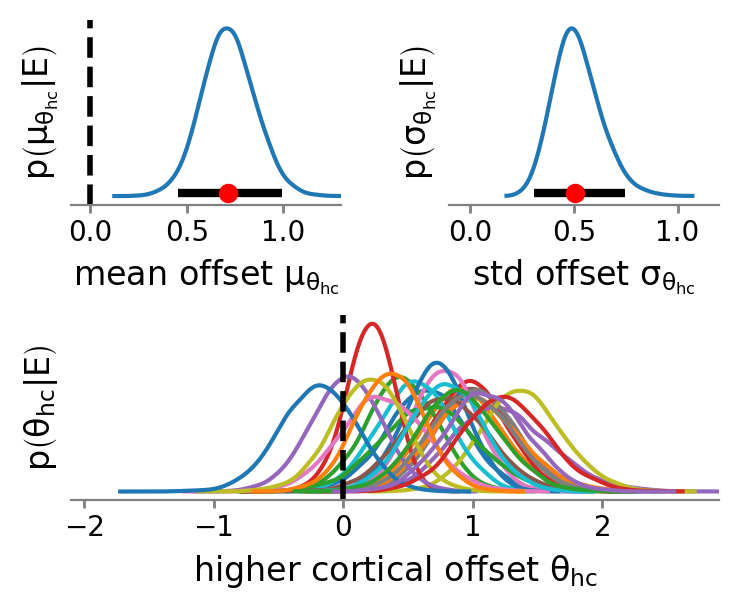

median:  2.4084858242988543
median:  0.35448826003657485


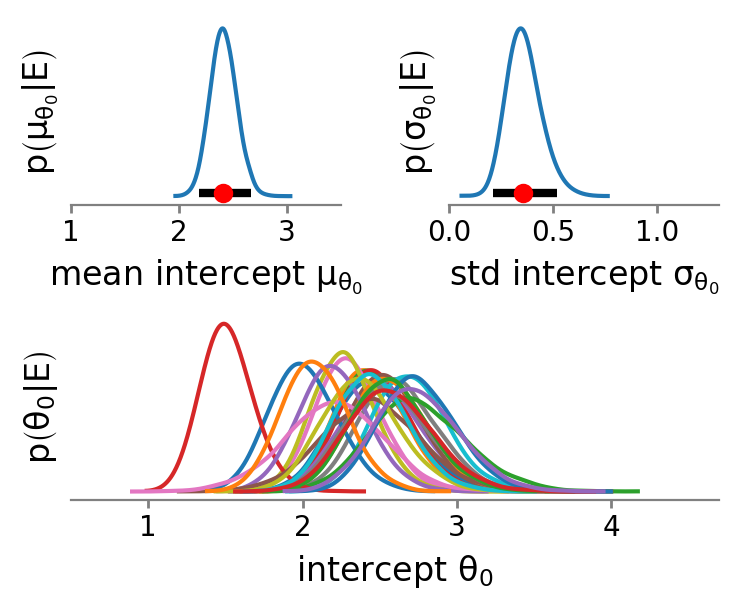

R_tot natural_movie_three
median:  -0.14406451143627894
median:  0.048041194884895


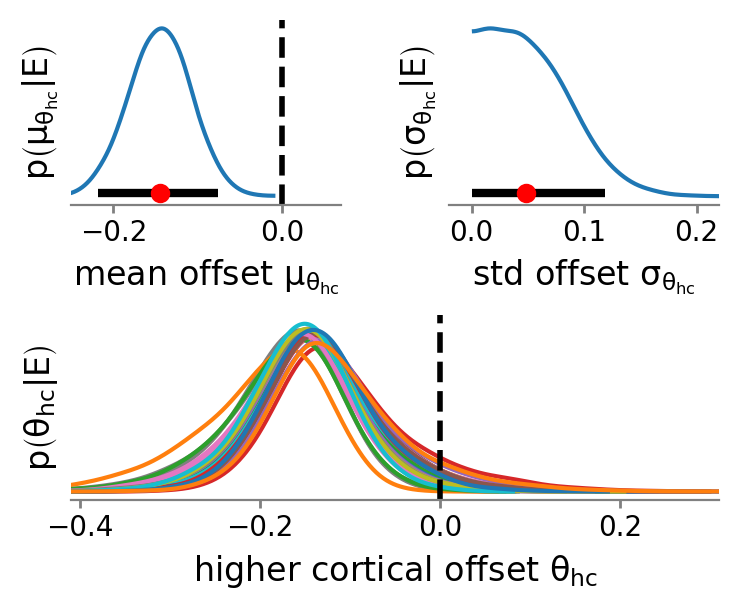

median:  1.102983033498227
median:  0.1981673454348682


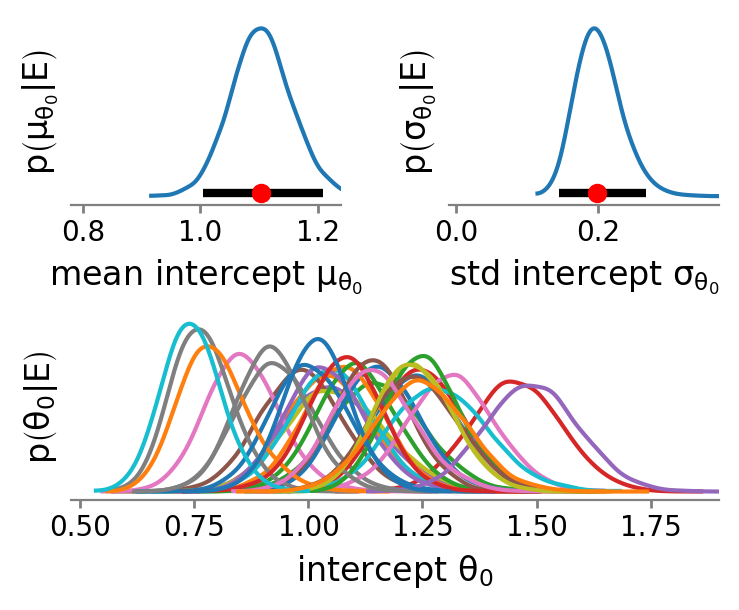

R_tot spontaneous
median:  -0.05702371525075445
median:  0.06765463123086313


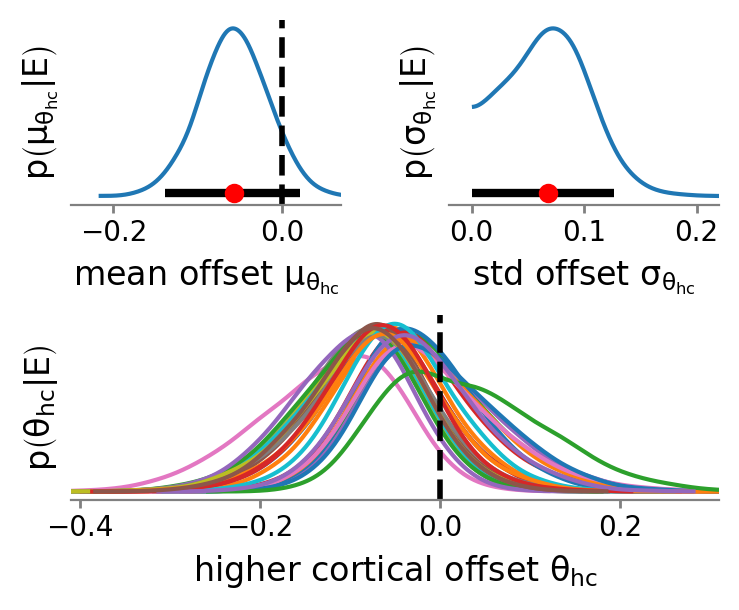

median:  1.071524576513165
median:  0.07005235833259275


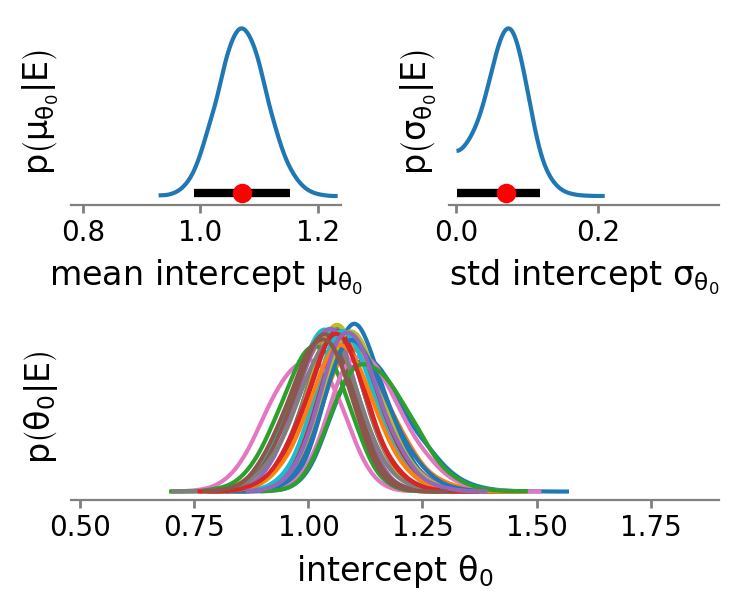

R_tot natural_movie_one_more_repeats
median:  -0.12709989123564483
median:  0.06503562289318088


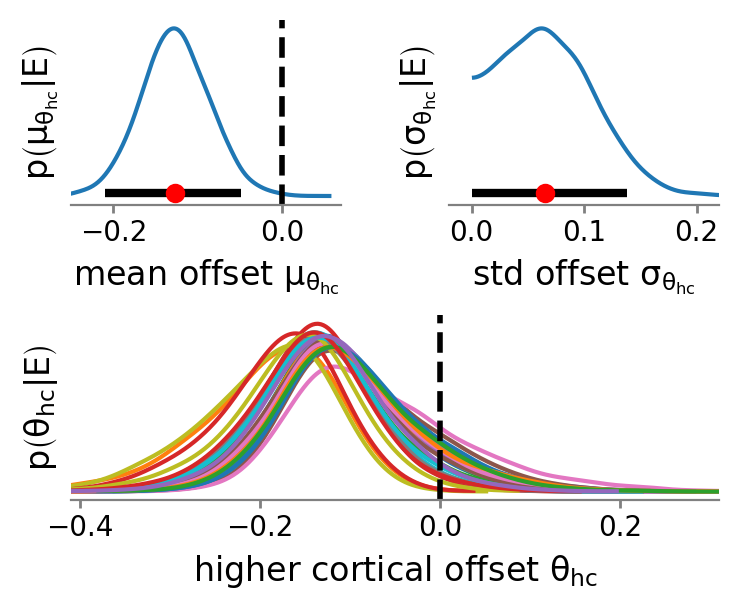

median:  1.0923767593311524
median:  0.1597046061125083


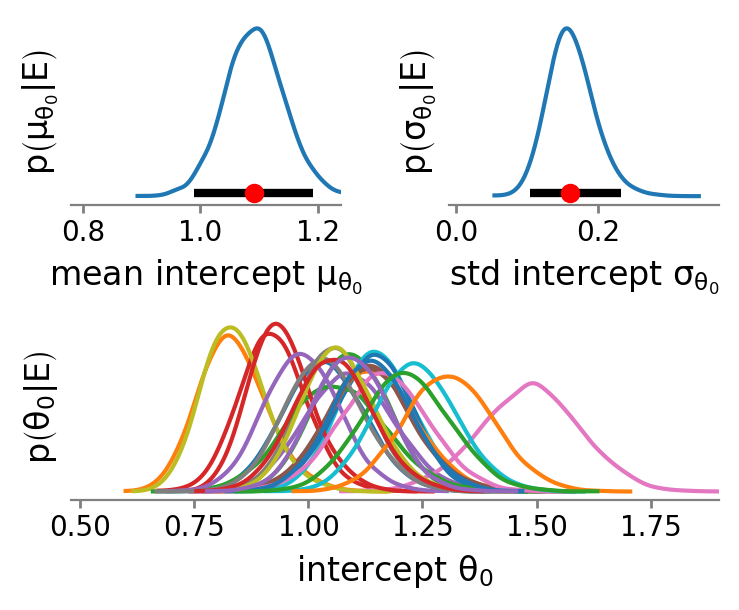

In [19]:
# posterior visualization (hierarchical parameters) for structure group model

model = "sgm"
measures = ["tau_double", "tau_R", "R_tot"]
stimuli = ["natural_movie_three", "spontaneous", "natural_movie_one_more_repeats"]

combinations = list(product(measures, stimuli))
loos = dict()
rc_kwargs = {
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "axes.titlesize": 12,
    "axes.labelsize": 12,
    "font.size": 10,
}

with plt.rc_context(rc_kwargs):
    # Plot hierarchy score posteriors for different measures and stimuli
    for meas, stim in tqdm(combinations):
        print(meas, stim)
        idata = az.from_netcdf(f"{data_dir}/bayes_cortex_{model}_{meas}_{stim}.nc")

        # # slope

        fig = plt.figure(figsize=(plot_settings["panel_width"] * 1.7, 3))
        # fig.suptitle(measure_name, ha = "center")
        # fig.suptitle("hierarchy score slope", ha = "center")

        ax1 = plt.subplot(2, 2, 1)
        ax2 = plt.subplot(2, 2, 2)
        ax3 = plt.subplot(2, 1, 2)
        fig.subplots_adjust(
            left=0.01, right=0.9, top=0.9, bottom=0.1, hspace=0.6, wspace=0.4
        )
        # if args.measure == "tau_C":
        #     ax1.set_xlim([-0.05,0.22])
        #     ax3.set_xlim([-0.24,0.44])
        # if args.measure == "tau_R":
        #     ax1.set_xlim([-0.02,0.14])
        #     ax3.set_xlim([-0.12,0.27])
        # if args.measure == "R_tot":
        #     ax1.set_xlim([-0.18,0.06])
        #     ax3.set_xlim([-0.31,0.21])
        if meas == "R_tot":
            bw = 0.01
        else:
            bw = 0.03
        ph.plot_posterior(
            idata,
            ax=ax1,
            var_names=["mu_hc_offset"],
            point_estimate="median",
            hdi_prob=0.95,
            bw=bw,
        )
        ax1.set_xlabel(r"mean offset $\mu_{\theta_{\mathrm{hc}}}$")
        ax1.set_ylabel(r"$p\left(\mu_{\theta_{\mathrm{hc}}} | E\right)$")
        ph.plot_posterior(
            idata,
            ax=ax2,
            var_names=["sigma_hc_offset"],
            point_estimate="median",
            hdi_prob=0.95,
            bw=bw,
        )
        ax2.set_xlabel(r"std offset $\sigma_{\theta_{\mathrm{hc}}}$")
        ax2.set_ylabel(r"$p\left(\sigma_{\theta_{\mathrm{hc}}} | E\right)$")

        ph.plot_posterior(
            idata,
            ax=ax3,
            var_names=["session_hc_offset"],
            hdi=False,
            bw=bw * 2,  # plotting session posteriors looks better with higher bandwidth
        )
        ax3.set_xlabel(r"higher cortical offset $\theta_{\mathrm{hc}}$")
        ax3.set_ylabel(r"$p\left(\theta_{\mathrm{hc}} | E\right)$")

        ax1.axvline(x=0, ls="--", lw=2, color="0.0")
        ax3.axvline(x=0, ls="--", lw=2, color="0.0")

        if meas == "R_tot":
            ax1.set_xlim([-0.25, 0.07])  # xrange for mean slope
            ax2.set_xlim([-0.02, 0.22])  # xrange for std slope
            ax3.set_xlim([-0.41, 0.31])  # xrange for session slope
        else:  # ranges for timescale posteriors
            ax1.set_xlim([-0.1, 1.3])  # xrange for mean slope
            ax2.set_xlim([-0.1, 1.2])  # xrange for std slope
            ax3.set_xlim([-2.1, 2.9])  # xrange for session slope

        # for ax in [ax1, ax2, ax3]:
        #     utl.make_plot_pretty(ax)
        plt.show()
        fig.savefig(
            f"../img/bayes_cortex_{model}_hc_offset_posterior_{meas}_{stim}.pdf",
            bbox_inches="tight",
            dpi=300,
        )

        # # intercept

        fig = plt.figure(figsize=(plot_settings["panel_width"] * 1.7, 3))
        # fig.suptitle(measure_name, ha = "center")
        # fig.suptitle("hierarchy score slope", ha = "center")

        ax1 = plt.subplot(2, 2, 1)
        ax2 = plt.subplot(2, 2, 2)
        ax3 = plt.subplot(2, 1, 2)
        fig.subplots_adjust(
            left=0.01, right=0.9, top=0.9, bottom=0.1, hspace=0.6, wspace=0.4
        )
        # if args.measure == "tau_C":
        #     ax1.set_xlim([-0.05,0.22])
        #     ax3.set_xlim([-0.24,0.44])
        # if args.measure == "tau_R":
        #     ax1.set_xlim([-0.02,0.14])
        #     ax3.set_xlim([-0.12,0.27])
        # if args.measure == "R_tot":
        #     ax1.set_xlim([-0.18,0.06])
        #     ax3.set_xlim([-0.31,0.21])
        if meas == "R_tot":
            bw = 0.01
        else:
            bw = 0.03
        ph.plot_posterior(
            idata,
            ax=ax1,
            var_names=["mu_intercept"],
            point_estimate="median",
            hdi_prob=0.95,
            bw=bw,
        )
        ax1.set_xlabel(r"mean intercept $\mu_{\theta_0}$")
        ax1.set_ylabel(r"$p\left(\mu_{\theta_0} | E\right)$")
        ph.plot_posterior(
            idata,
            ax=ax2,
            var_names=["sigma_intercept"],
            point_estimate="median",
            hdi_prob=0.95,
            bw=bw,
        )
        ax2.set_xlabel(r"std intercept $\sigma_{\theta_0}$")
        ax2.set_ylabel(r"$p\left(\sigma_{\theta_0} | E\right)$")

        ph.plot_posterior(
            idata,
            ax=ax3,
            var_names=["session_intercept"],
            hdi=False,
            bw=bw * 2,  # plotting session posteriors looks better with higher bandwidth
        )
        ax3.set_xlabel(r"intercept $\theta_{0}$")
        ax3.set_ylabel(r"$p\left(\theta_{0} | E\right)$")

        # fix ranges
        if meas == "R_tot":
            ax1.set_xlim([0.78, 1.24])  # xrange for mean slope
            ax2.set_xlim([-0.01, 0.37])  # xrange for std slope
            ax3.set_xlim([0.48, 1.9])  # xrange for session slope
        else:  # ranges for timescale posteriors
            ax1.set_xlim([1.0, 3.5])  # xrange for mean slope
            ax2.set_xlim([0, 1.3])  # xrange for std slope
            ax3.set_xlim([0.5, 4.7])  # xrange for session slope

        # for ax in [ax1, ax2, ax3]:
        #     utl.make_plot_pretty(ax)
        plt.show()
        fig.savefig(
            f"../img/bayes_cortex_{model}_intercept_posterior_{meas}_{stim}.pdf",
            bbox_inches="tight",
            dpi=300,
        )

In [ ]:
## posterior visualization (non-hierarchical parameters)
#%%
from itertools import product
from tqdm.notebook import tqdm

models = ['sgm', 'lm']
measures = ["tau_double", "tau_R", "R_tot"]
stimuli = ["natural_movie_three", "spontaneous", "natural_movie_one_more_repeats"]

combinations = list(product(measures, stimuli, models))
loos = dict()

for meas, stim, model in tqdm(combinations):
    idata = az.from_netcdf(f"{data_dir}/bayes_{model}_{meas}_{stim}.nc")
    loos[f"{model}_{meas}_{stim}"] = az.loo(idata, pointwise=True)

    # Here starts the old plotting script

    if meas == "R_tot":
        n_axes = 3
        fig_height = 4.5
    else:
        n_axes = 4
        fig_height = 6


    fig1, axes = plt.subplots(n_axes, 1, figsize=(plot_settings["panel_width"], fig_height))
    fig1.subplots_adjust(left=0.01, right=0.9, top=0.9, bottom=0.1, hspace=1)
    axes[0].axvline(x=1, ls = "--", lw =2, color = "0.0")
    axes[1].axvline(x=1, ls = "--", lw =2, color = "0.0")
    # utl.plot_posterior(trc[-250:], var_names=['mu_intercept'],
    #                    #coords=0,
    #                    ax=axes[0], point_estimate='median',
    #                    hdi_prob=0.95,
    #                    transform=f_transf_int)

    # How does trc relate to idata that we load now? It's the same. Here, only load the last 1000 samples, to ensure that samples are drawn from chains that have converged yet.
    # can we simply incorporate the old plot function here? Try this out!
    utl.plot_posterior(trc[-1000:], var_names=[#'b0_intercept',
                                              'b_sign_rf',
                                              #'stimulus[T.spontaneous]',
                                              #'sign_rf[T.True]:stimulus[T.spontaneous]',
                                              # 'firing_rate',
                                              'b_log_fr'],
                       #coords=0,
                       ax=axes[:2], point_estimate='median',
                       hdi_prob=0.95,
                       transform=f_transf)
    utl.plot_posterior(trc[-1000:], var_names=['epsilon'],
                       ax=axes[2], point_estimate='median',
                       hdi_prob=0.95,
                       transform=f_transf_log)
    if not args.measure == "R_tot":
        utl.plot_posterior(trc[-1000:], var_names=['alpha'],
                           ax=axes[3], point_estimate='median',
                           hdi_prob=0.95)
    vars = [r'$\mathrm{θ_{rf}}$', r'$θ_{\log \nu}$', 'ε', r'$\alpha$']
    var_names = [r'$\exp(\mathrm{θ_{rf}})$ (responsiveness)', r'$\exp(θ_{\log \nu})$ (log fir. rate)', 'ε (scale)', r'$\alpha$ (shape)']
    for ax, var, var_name in zip(axes, vars[:n_axes], var_names[:n_axes]):
#'$θ_0$ (no rf, fir. rate={:.2f}Hz)'.format(10**np.mean(data['log_fr'])),
        #ax.set_xlabel(var)
        ax.set_ylabel('p({} | E)'.format(var))
        #ax.set_title(var_name)
        ax.set_xlabel(var_name)
        ax.set_title('')
        utl.make_plot_pretty(ax)

    axes[0].set_title(measure_name, ha='center')
    #axes[0].set_xticks([0.06, 0.065])
    #axes[1].set_xticks([-0.075, -0.08, -0.004])
    #axes[2].set_xticks([-0.012, -0.008, -0.004])
    #axes[3].set_xticks([-0.015, -0.01, -0.005])
    #axes[4].set_xticks([0.45, 0.5])
    #axes[5].set_xticks([0.048, 0.049, 0.05])

utl.save_plot(plot_settings, f"{__file__[:-3]}_posterior", allen_bo=args.allen_bo, stimulus=args.stimulus, measure=args.measure)

# with model:
#     fig0, ax0 = plt.subplots(1, 1, figsize=(plot_settings["panel_width"], 2))
#     fig0.subplots_adjust(left=0.01, right=0.9, top=0.9, bottom=0.1, hspace=1)
#
#     utl.plot_posterior(trc[-250:], var_names=['mu_area'],
#                        ax=ax0, point_estimate='median',
#                        hdi_prob=0.95,
#                        transform=f_transf)
#
#     ax0.set_ylabel('p({$θ_3$} | E)')
#     ax0.set_xlabel('$θ_3$ (hier. score)')
#     ax0.set_title('')
#     utl.make_plot_pretty(ax0)
#
#     axes[0].set_title(measure_name, ha='center')
#
# utl.save_plot(plot_settings, f"{__file__[:-3]}_posterior_hierarchy_score", measure=args.measure)

